In [270]:
# python script to download andextract the zipped files.

import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH): 
    if not os.path.isdir(housing_path):
         os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [10]:
fetch_housing_data()

In [11]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH): 
    csv_path = os.path.join(housing_path, "housing.csv") 
    return pd.read_csv(csv_path)

In [12]:
housing = load_housing_data()

In [27]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [28]:
import matplotlib.pyplot as plt

In [29]:
%matplotlib inline

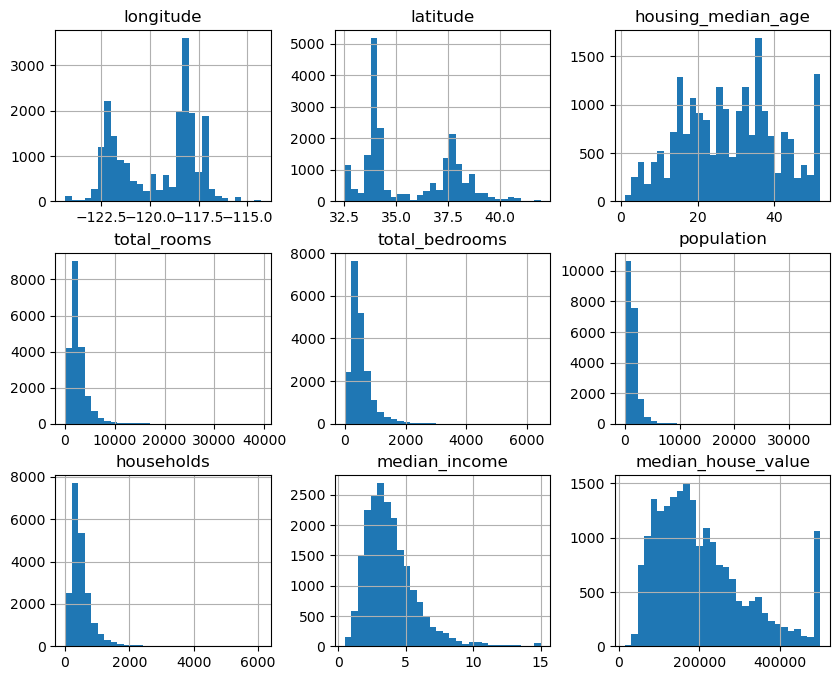

In [31]:
housing.hist(figsize=(10,8),bins=30)
plt.show()

In [32]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) 
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [33]:
train_set,test_set = split_train_test(housing,0.2)

In [34]:
len(train_set)

16512

In [35]:
len(test_set)

4128

In [20]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
print(housing['ocean_proximity'].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [36]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

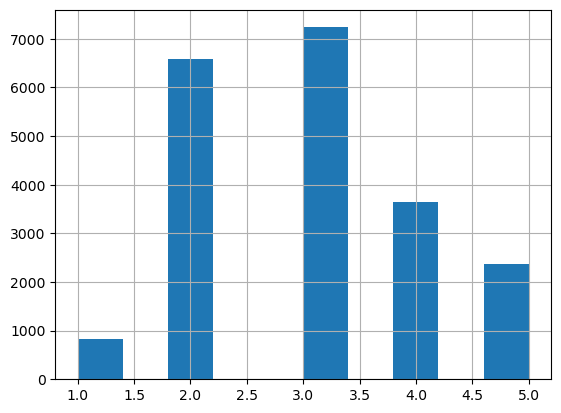

In [38]:
housing['income_cat'].hist()

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

In [271]:
income_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

sklearn.model_selection._split.StratifiedShuffleSplit

In [45]:
for train_index, test_index in income_split.split(housing, housing["income_cat"]):
        strat_train_set = housing.loc[train_index]
        strat_test_set = housing.loc[test_index]

In [58]:
strat_train_set['income_cat'].value_counts()

3    5789
2    5265
4    2911
5    1890
1     657
Name: income_cat, dtype: int64

In [62]:
# drops the income_cat column from stratified training and test set

for set_ in (strat_train_set, strat_test_set): 
    set_.drop("income_cat", axis=1, inplace=True)

In [67]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

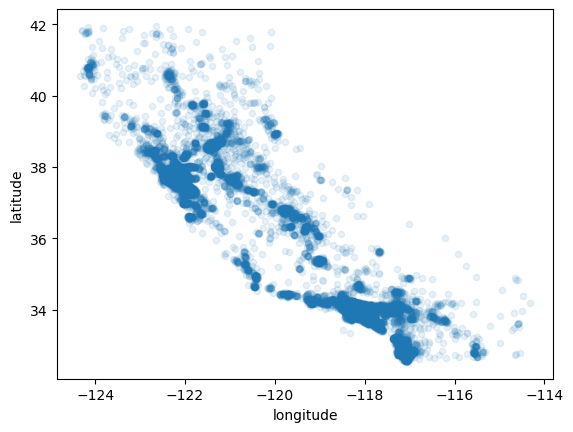

In [73]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

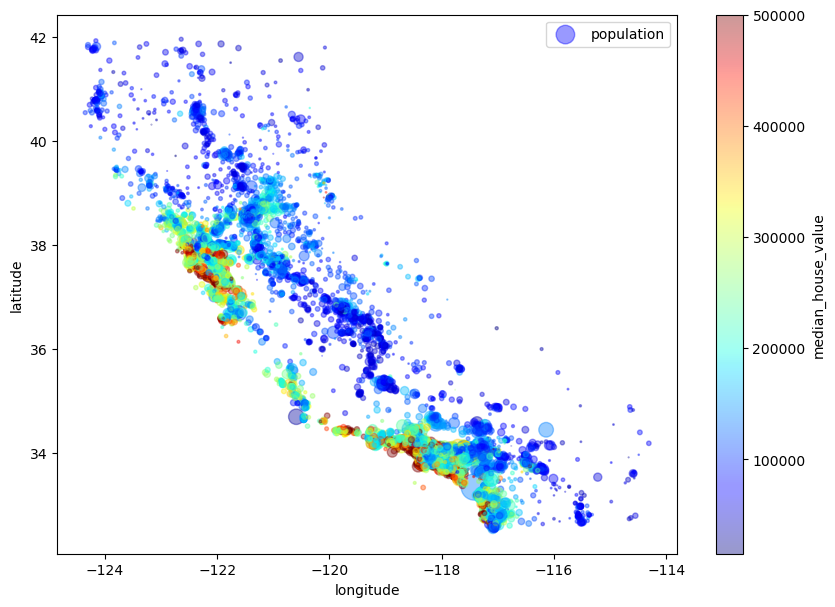

In [76]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=housing["population"]/100, 
             label="population", figsize=(10,7),c="median_house_value", cmap=plt.get_cmap("jet"), 
             colorbar=True)
plt.legend()

In [80]:
# calculates the correlation of the data
corr_matrix=housing.corr() 

In [273]:
corr_matrix['median_house_value']

longitude                  -0.047466
latitude                   -0.142673
housing_median_age          0.114146
total_rooms                 0.135140
total_bedrooms              0.047781
population                 -0.026882
households                  0.064590
median_income               0.687151
median_house_value          1.000000
population_per_household   -0.021991
bedrooms_per_room           0.385233
rooms_per_household         0.146255
Name: median_house_value, dtype: float64

In [82]:
from pandas.plotting import scatter_matrix

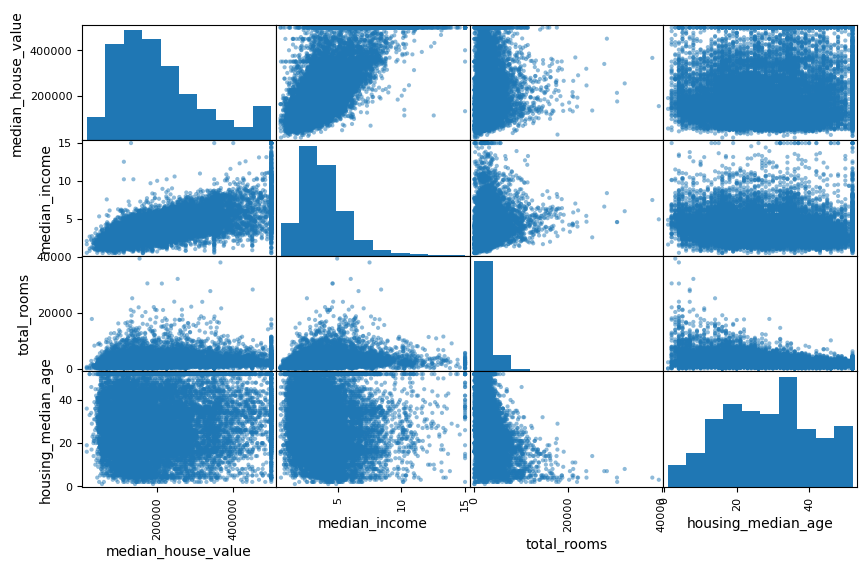

In [86]:
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(10,6))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

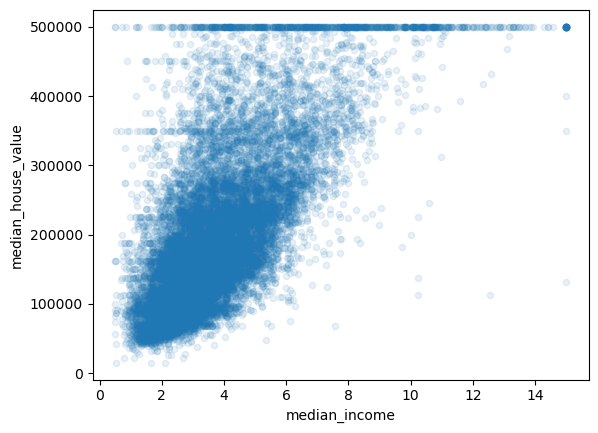

In [87]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

In [88]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
# feature extraction
# information like total rooms,total bedrooms etc are not that helpful for the machine learning algorithm
# what we want to do is extraction of some extra features using the existing features which might be helpful 
# for machine learning algos.

In [89]:
housing['population_per_household'] = housing['population']/housing['households']
housing['bedrooms_per_room'] = housing['total_rooms']/housing['total_bedrooms']
housing['rooms_per_household'] = housing['total_rooms']/housing['households']

In [102]:
corr_matrix = housing.corr()

In [105]:
corr_matrix['population_per_household'].sort_values()

total_bedrooms             -0.028364
households                 -0.027411
total_rooms                -0.024806
median_house_value         -0.021991
rooms_per_household        -0.005316
bedrooms_per_room          -0.003245
longitude                  -0.000415
latitude                    0.005426
housing_median_age          0.015031
median_income               0.021815
population                  0.076232
population_per_household    1.000000
Name: population_per_household, dtype: float64

In [ ]:
# try to extract new features from the the data having very correlation with the target feature.

In [107]:
housing = strat_train_set.drop(['median_house_value'],axis=1)

In [109]:
housing_labels = strat_train_set['median_house_value'].copy()

In [111]:
import seaborn as sns

In [124]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


<AxesSubplot:>

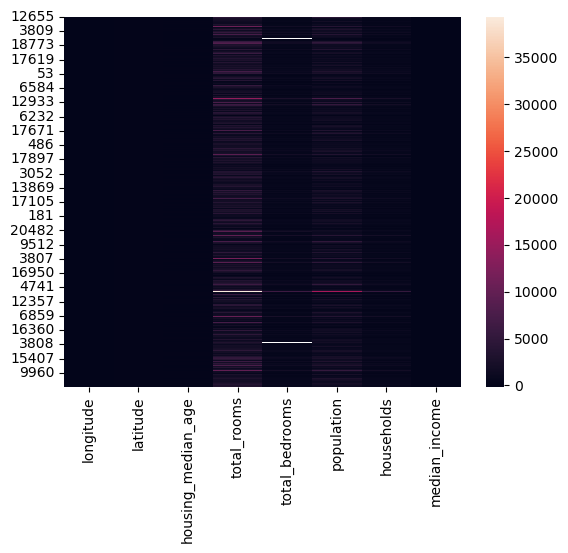

In [127]:
sns.heatmap(data=housing.drop(['ocean_proximity'],axis=1))

In [132]:
from sklearn.impute import SimpleImputer

In [133]:
imputer = SimpleImputer(strategy='median')

In [134]:
housing_num = housing.drop(['ocean_proximity'],axis=1)

Estimator :: takes a dataset and estimates something based on the dataset.ex,calculates mean of the columns.

Transformer :: transform the dataset into new one with the estimated value from the estimator

Predictor :: Estimator that can predict the value.ex,linear regression model.

In [138]:
imputer.fit(housing_num) # it won't fit the data already in the housing_num dataframe.
                         # it has just computed the value of the median in each axis and stored value in 
                         # varible statistics_

SimpleImputer(strategy='median')

<AxesSubplot:>

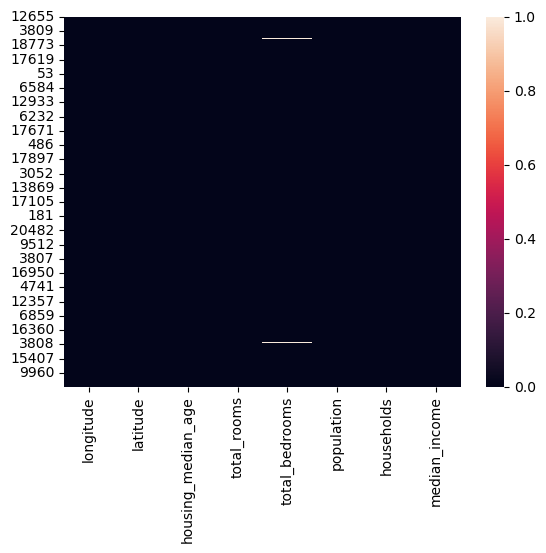

In [149]:
sns.heatmap(housing_num.isnull()) # median values are not fitted in the dataframe

In [141]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [143]:
X_imputed = imputer.transform(housing_num)

In [144]:
X_imputed

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [145]:
# to put the imputed values in the dataframe again 

housing_tr = pd.DataFrame(X_imputed,columns=housing_num.columns)

<AxesSubplot:>

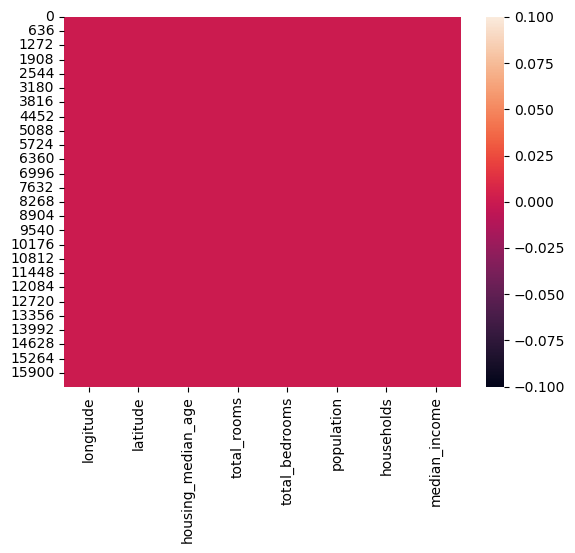

In [148]:
sns.heatmap(housing_tr.isnull())

In [153]:
housing_cat = housing[['ocean_proximity']]

In [155]:
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [157]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [159]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [164]:
ordinal_encoder.categories_

# problem with this implementation is that the machine learning algorithm will learn that the nearest two 
# categories are the most related categories but that is not the case here,"<1H OCEAN" and "NEAR OCEAN" which
# are 1 and 5 category are more related than 1 and 2. So, another encoding method is used.

# This implementation is okay if the categories are like “bad”, “average”, “good”, “excellent” where 1 and 2 
# are more correlated.

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [166]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
housing_cat_onehot = onehot_encoder.fit_transform(housing_cat)

In [169]:
housing_cat_onehot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
# sparse matrices data structures

# Imagine you have a two-dimensional data set with 10 rows and 10 columns such that each element contains a value.
# We can also call such data as matrix, in this example it is a dense 10 x 10 matrix. Now imagine, you have
# a 10 x 10 matrix with only very few elements of the matrix is non-zero. In that case, storing the data in 
# such a two dimensional data structure is waste of space.

# Sparse matrices are memory efficient data structures that enable us store large matrices with very few 
# non-zero elements aka sparse matrices. 

In [174]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y=None):
        return self # nothing else to do def transform(self, X, y=None):
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] 
        population_per_household = X[:, population_ix] / X[:, households_ix] 
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [175]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [226]:
from sklearn.compose import ColumnTransformer 
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
     ("num", num_pipeline, num_attribs),
     ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)

In [227]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [230]:
from sklearn.metrics import mean_squared_error

In [233]:
# checking the error of the model in a subset of the training dataset prepared

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

predictions = lin_reg.predict(some_data_prepared)
lin_mse = mean_squared_error(y_true=some_labels,y_pred=predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

47159.223874067306


In [236]:
# checking the error in the full training dataset prepared

housing_predictions = lin_reg.predict(housing_prepared)
lin_reg_mse = mean_squared_error(y_true=housing_labels,y_pred=housing_predictions)
lin_reg_rmse = np.sqrt(lin_reg_mse)
print(lin_reg_rmse)

68627.87390018745


since there is a lot of error in the model, let's try another model which is more powerful and complex than 
linear model

In [245]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared,housing_labels)

housing_pred_tree = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(y_true=housing_labels,y_pred=housing_pred_tree)

tree_rmse = np.sqrt(tree_mse)

print(tree_rmse)

0.0




Cross_val_score is a function in the scikit-learn package which trains and tests a model over multiple folds of your dataset. This cross validation method gives you a better understanding of model performance over the whole dataset instead of just a single train/test split.



In [262]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

tree_rmse_score = np.sqrt(-scores)

print(f'Scores::{tree_rmse_score}')
print("Mean::" ,tree_rmse_score.mean())
print("Standard Deviation::" ,tree_rmse_score.std())

Scores::[74201.95999671 70575.40207985 67819.58628503 71624.20272528
 69389.54230475 77434.80393299 71953.65540929 73095.509882
 68781.6726152  71601.75830525]
Mean:: 71647.8093536358
Standard Deviation:: 2670.6723397284554


Results we saw earlier where the decision tree produced the 0 error is clearly seen now that it was 
overfitted then. When we performed the cross validation k-fold check result are worse than the linear model.

In [268]:
scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

lin_rmse_score = np.sqrt(-scores)

print(f'scores::{lin_rmse_score}')
print(f'mean::{lin_rmse_score.mean()}')
print(f'standard deviation::{lin_rmse_score.std()}')

scores::[71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
mean::69104.07998247063
standard deviation::2880.328209818068


Looking at the results, we can see that linear regression model has done well than the decision tree model

In [269]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()


scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

forest_rmse_score = np.sqrt(-scores)

print(f'scores::{forest_rmse_score}')
print(f'mean::{forest_rmse_score.mean()}')
print(f'standard deviation::{forest_rmse_score.std()}')

scores::[51844.70090625 49121.02863084 46975.02118553 51672.55613397
 47354.07372337 51794.14211902 52656.74792851 50118.21227647
 48623.47155955 53684.16694821]
mean::50384.41214117389
standard deviation::2177.2872607901745


In [274]:
from sklearn.datasets import fetch_openml

In [275]:
mnist = fetch_openml('mnist_784',version=1)

In [278]:
print(f'type of mnist:: {type(mnist)}')

type of mnist:: <class 'sklearn.utils.Bunch'>


In [288]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [352]:
X, y = mnist['data'],mnist['target']

In [298]:
X.shape

(70000, 784)

In [299]:
y.shape

(70000,)

In [318]:
28*28

784

In [316]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [406]:
some_digit = X.loc[0]

In [407]:
some_digit_image = some_digit.values.reshape(28,28) # some_digit is a Series which cannot be reshaped so we 
                                                    # changed it to numoy array and reshaped it

(-0.5, 27.5, 27.5, -0.5)

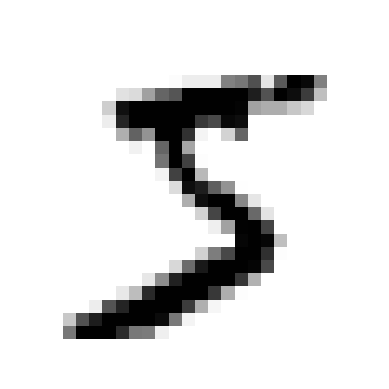

In [408]:
plt.imshow(X=some_digit_image,cmap=mpl.cm.binary,interpolation='nearest')
plt.axis('off')

In [409]:
y[0]

5

In [410]:
type(y[0])

numpy.uint8

In [411]:
y = y.astype(np.uint8) # astype is a method to change the dataframe to another type.

In [412]:
type(y[0])

numpy.uint8

We have to split the dataset into training and test dataset and shuffle them well for the cross validation.
This dataset from MNIST is already splitted into train and test set. 

In [413]:
 X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [414]:
y_train_5 = (y_train==5)

In [415]:
data = np.asarray(y_train_5).reshape(60000,1)

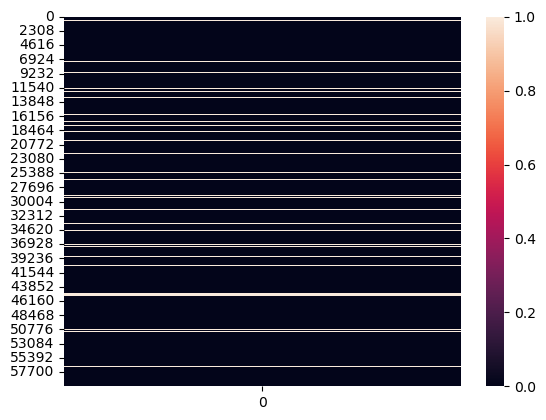

In [416]:
sns.heatmap(data)
plt.show()

In [417]:
y_test_5 = (y_test==5)

In [418]:
from sklearn.linear_model import SGDClassifier

In [419]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [420]:
sgd_clf.predict([some_digit])

/Users/nirajanpaudel17/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [391]:
from sklearn.model_selection import cross_val_score

In [392]:
cross_val_score(estimator=sgd_clf,X=X_train,y=y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [393]:
cross_val_score(estimator=sgd_clf,X=X_train,y=y_train_5,cv=3)

array([0.95035, 0.96035, 0.9604 ])

In [394]:
from sklearn.model_selection import cross_val_predict

In [396]:
y_train_pred = cross_val_predict(estimator=sgd_clf,X=X_train,y=y_train_5,cv=3)

In [397]:
from sklearn.metrics import confusion_matrix

In [398]:
confusion_matrix(y_true=y_train_5,y_pred=y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [421]:
y_scores = sgd_clf.decision_function([some_digit])

/Users/nirajanpaudel17/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [422]:
y_scores

array([2164.22030239])

In [429]:
threshold = 3000

In [430]:
y_some_digit_pred = (y_scores>threshold)

In [431]:
y_some_digit_pred

array([False])

Recall and Prediction

Prediction is the measurement of how many true positives can the model generate over false positives.

Recall is how many the actual data can it predict from the given dataset.Ex, if there are 400 "5's" is the 
dataset, how many of them are predicted.


When we increase the threshold value, precision increases but the recall decreases and vice versa.

To find out the accurate threshold, we can do the following

In [432]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

In [434]:
y_scores # these are the scores for each folds 

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [435]:
from sklearn.metrics import precision_recall_curve

In [436]:
precisions,recalls,thresholds = precision_recall_curve(y_true=y_train_5,probas_pred=y_scores)

In [438]:
print(f'precisions::{precisions}')
print(f'recalls::{recalls}')
print(f'thresholds::{thresholds}')

precisions::[0.09040123 0.09038606 0.09038757 ... 1.         1.         1.        ]
recalls::[1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]
thresholds::[-106527.45300471 -105763.22240074 -105406.2965229  ...   38871.26391927
   42216.05562787   49441.43765905]


In [454]:
def precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'g--',label='Precision')
    plt.plot(thresholds,recalls[:-1],'b',label='Recall')
    plt.legend()

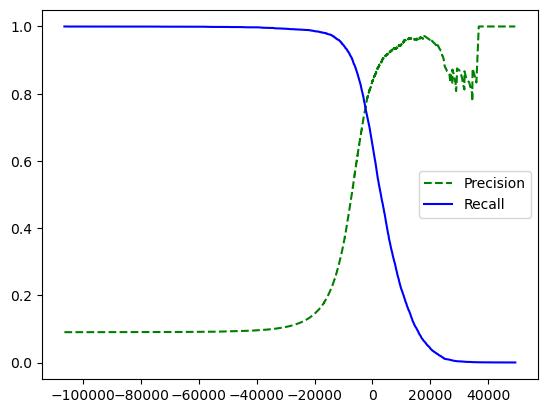

In [455]:
precision_recall_vs_threshold(precisions,recalls,thresholds)

In [461]:
from sklearn.metrics import roc_curve  # receiver operating characterstics

In [462]:
fpr, tpr, thresholds = roc_curve(y_true=y_train_5, y_score=y_scores)

In [467]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr)
    plt.xlabel('false positive rates')
    plt.ylabel('true positive rates')

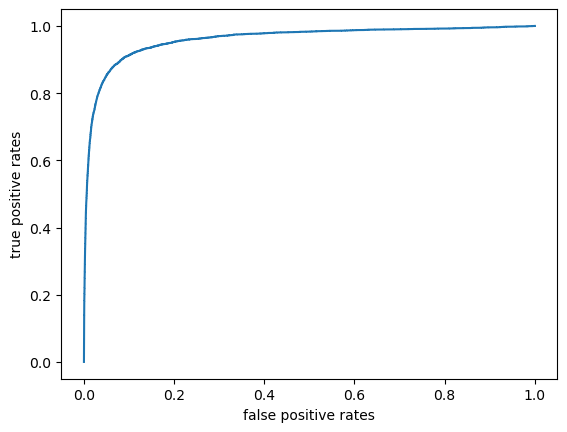

In [468]:
plot_roc_curve(fpr,tpr)

In [470]:
from sklearn.metrics import roc_auc_score

In [472]:
roc_auc_score(y_true=y_train_5,y_score=y_scores)

0.9604938554008616

Now let's train the SGDClassifier using whole training set.

Under the hood, one versus all (OvA) mechanism is used for the SGDClassifier.This means that 0 vs 1,2,3,4.....,
....1 vs 2,3,4... 
10 classifers are trained on this process.

In [473]:
sgd_clf.fit(X=X_train,y=y_train)

SGDClassifier(random_state=42)

In [490]:
sgd_clf.predict([X_train.loc[77]])

/Users/nirajanpaudel17/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=uint8)

In [498]:
some_digit_score = sgd_clf.decision_function([X_train.loc[77]])

/Users/nirajanpaudel17/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [499]:
some_digit_score  # indeed the scores of index is higher than others which is why the classifier predicted '1'

array([[-26703.75958345,   6392.35695068,  -5310.54461397,
         -1178.24063388, -14027.37336755,  -5569.92269769,
        -25445.12028949, -10033.52115441,   -199.20273362,
         -5903.02642662]])

In [505]:
print(np.max(some_digit_score))
print(np.argmax(some_digit_score))

6392.356950682909
1


In [515]:
from sklearn.ensemble import RandomForestClassifier

In [516]:
forest_clf = RandomForestClassifier(random_state=42)

In [517]:
forest_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [518]:
forest_clf.predict([some_digit])

/Users/nirajanpaudel17/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [523]:
forest_clf.predict_proba([some_digit])

/Users/nirajanpaudel17/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [524]:
from sklearn.preprocessing import StandardScaler

In [525]:
scaler = StandardScaler()

In [537]:
X_train_scaled = scaler.fit_transform(X_train)

In [540]:
y_train_pred = cross_val_predict(sgd_clf,X=X_train_scaled,y=y_train,cv=3)

In [544]:
conf_mx = confusion_matrix(y_true=y_train,y_pred=y_train_pred)

In [545]:
conf_mx  # rows are the actual values or classes and the columns are the predicted classes

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

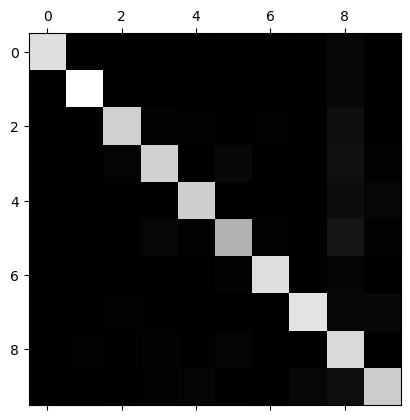

In [553]:
# sns.heatmap(conf_mx,annot=False)

# diagonal elements are the true positives 

plt.matshow(conf_mx,cmap=plt.cm.gray)  # shows the array as an matrix

In [557]:
row_sums = conf_mx.sum(axis=1,keepdims=True)

In [558]:
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]])

In [562]:
norm_conf_mx = conf_mx/row_sums

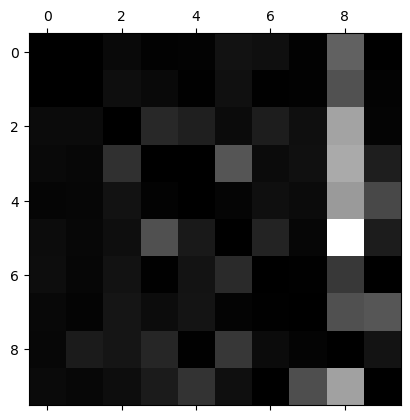

In [568]:
np.fill_diagonal(norm_conf_mx,val=0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)

# this plot shows that actual '5' is often misclassified as '8'(the brightest spot).similarly we can 
   # analyze other.
# we know for sure that most images are predicted as '8' falsely as there is brighter column of predicted '8'